Inisialisasi Library

In [2]:
import pandas as pd
import re

Baca dataset

In [25]:
df = pd.read_csv('tweets-data/kilang_minyak_data.csv')

Casefolding data text dan Text Removal

In [46]:
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()                             # ubah ke huruf kecil
    text = re.sub(r'http\S+|www\.\S+', '', text)    # hapus URL
    text = re.sub(r'@\w+', '', text)                # hapus mention (@username)  
    text = re.sub(r'#\w+', '', text)                # hapus hashtag (#hashtag)  
    text = re.sub(r'[^a-z\s]', '', text)            # hapus karakter non-huruf
    text = re.sub(r'\s+', ' ', text).strip()        # hapus spasi berlebih
    return text

df['cleaned_text'] = df['full_text'].apply(clean_text)
df[['full_text', 'cleaned_text']].head(10)

,full_text,cleaned_text
0,@luckylucky0971 @PaltiHutabarat Indonesia Emas pak Presiden @prabowo Bangun industri otomotif yg kuat bangun industri telekomunikasi bangun industri pesawat tempur bangun industri alat berat bangun kilang kilang minyak yg hebat Tidak usah geleng geleng kepala bingung liat koruptor @BANGSAygSUJUD,indonesia emas pak presiden bangun industri otomotif yg kuat bangun industri telekomunikasi bangun industri pesawat tempur bangun industri alat berat bangun kilang kilang minyak yg hebat tidak usah geleng geleng kepala bingung liat koruptor
1,@MMicen @BosPurwa Dengarkan baik2 kata2 yang dia ucapkan.. Udah jelas fokus dia pertamina yang males2an buat kilang minyak baru.. Cuma fokus 1 kalimat aja tapi konteks yang dibahas kaga tau..,dengarkan baik kata yang dia ucapkan udah jelas fokus dia pertamina yang malesan buat kilang minyak baru cuma fokus kalimat aja tapi konteks yang dibahas kaga tau
2,@dhaintly Kalau bikin kilang otomatis gk ada proyek import minyak buat Elite PERTAMINA dong Boss @prabowo @PurbayaYudhi,kalau bikin kilang otomatis gk ada proyek import minyak buat elite pertamina dong boss
3,Impor BBM Bebani APBN Purbaya Sebut Pertamina Malas Bangun Kilang Minyak Baru https://t.co/aDP7NdJrLB,impor bbm bebani apbn purbaya sebut pertamina malas bangun kilang minyak baru
4,@Dennysiregar7 @pertamina @NasbiHasan Jadi kapan Pertamina akan mulai membangun Kilang.? Coba DPR melakukan rapat dg Menteti BUMN Menteri ESDM dan Pertamina mengapa kilang kilang minyak tidak dibangun apa kendalanya tagih komitmentnya. Kalau import terus pasti banyak mafia yg diuntungkan.,jadi kapan pertamina akan mulai membangun kilang coba dpr melakukan rapat dg menteti bumn menteri esdm dan pertamina mengapa kilang kilang minyak tidak dibangun apa kendalanya tagih komitmentnya kalau import terus pasti banyak mafia yg diuntungkan
5,@DS_yantie @desmodromici1 @NasbiHasan harus membangun kilang minyak ! Secepatnya !!,harus membangun kilang minyak secepatnya
6,@regar_op0sisi Sudah dari zaman orba ga ada kilang. Pada waktu itu Indonesia negara penghasil minyak bumi. Gabung dalam OPEC. Penghasil minyak malah tidak di proses. Jual minyak mentah impor bensin solar dll alasannya adaaa saja....,sudah dari zaman orba ga ada kilang pada waktu itu indonesia negara penghasil minyak bumi gabung dalam opec penghasil minyak malah tidak di proses jual minyak mentah impor bensin solar dll alasannya adaaa saja
7,@dhaintly Issu ini dr dulu udah jadi bahan debat capres tapi koq gak ada presiden yg berani bikin kilang minyak ya? Siapa sih yg diuntungkan dgn beli mintak dr Singapura?,issu ini dr dulu udah jadi bahan debat capres tapi koq gak ada presiden yg berani bikin kilang minyak ya siapa sih yg diuntungkan dgn beli mintak dr singapura
8,@CakKhum Da mah yaaaaa harusnya mah ga usah buru2 bangun IKN mending mikirin bangun kilang minyak di Indo.,da mah yaaaaa harusnya mah ga usah buru bangun ikn mending mikirin bangun kilang minyak di indo
9,Seharusnya dari dulu udah bikin kilang minyak yang banyak.. negara kita sibuk mau korupsi makanya ga mikir Bagun kilang minyak itu,seharusnya dari dulu udah bikin kilang minyak yang banyak negara kita sibuk mau korupsi makanya ga mikir bagun kilang minyak itu


Handling Chatwords

In [ ]:
stopword_data = 'dataset/data_text_informal_to_formal.csv'
df_stopwords = pd.read_csv(stopword_data, sep=';')
df_stopwords.head()

,no,transformed,original-for,transformation
0,19,sampe,sampai,sound-alter
1,29,dgn,dengan,disemvoweling
2,32,org,orang,disemvoweling
3,34,karna,karena,disemvoweling
4,35,tu,itu,disemvoweling


In [ ]:
def replace_chatwords(text):
    words = text.split()
    replaced_words = [formal_text.get(word, word) for word in words]
    return ' '.join(replaced_words)

formal_text = df_stopwords.set_index('transformed')['original-for'].to_dict()
df['cleaned_text'] = df['cleaned_text'].apply(replace_chatwords)

Handling Stopword

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
df['cleaned_text'] = df['cleaned_text'].apply(stopword.remove)

Tokenizer

In [45]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)
df[['cleaned_text', 'tokenized_text']].head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kinan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_text,tokenized_text
0,indonesia emas pak presiden bangun industri otomotif kuat bangun industri telekomunikasi bangun industri pesawat tempur bangun industri alat berat bangun kilang kilang minyak hebat usah geleng geleng kepala bingung liat koruptor,"[indonesia, emas, pak, presiden, bangun, industri, otomotif, kuat, bangun, industri, telekomunikasi, bangun, industri, pesawat, tempur, bangun, industri, alat, berat, bangun, kilang, kilang, minyak, hebat, usah, geleng, geleng, kepala, bingung, liat, koruptor]"
1,dengarkan baik kata ucapkan udah jelas fokus pertamina malesan buat kilang minyak baru cuma fokus kalimat konteks dibahas kagak tau,"[dengarkan, baik, kata, ucapkan, udah, jelas, fokus, pertamina, malesan, buat, kilang, minyak, baru, cuma, fokus, kalimat, konteks, dibahas, kagak, tau]"
2,kalau bikin kilang otomatis proyek import minyak buat elite pertamina dong boss,"[kalau, bikin, kilang, otomatis, proyek, import, minyak, buat, elite, pertamina, dong, boss]"
3,impor bbm bebani apbn purbaya sebut pertamina malas bangun kilang minyak baru,"[impor, bbm, bebani, apbn, purbaya, sebut, pertamina, malas, bangun, kilang, minyak, baru]"
4,jadi kapan pertamina mulai membangun kilang coba dpr melakukan rapat menteti bumn menteri esdm pertamina kilang kilang minyak dibangun apa kendalanya tagih komitmentnya kalau import terus banyak mafia diuntungkan,"[jadi, kapan, pertamina, mulai, membangun, kilang, coba, dpr, melakukan, rapat, menteti, bumn, menteri, esdm, pertamina, kilang, kilang, minyak, dibangun, apa, kendalanya, tagih, komitmentnya, kalau, import, terus, banyak, mafia, diuntungkan]"
5,membangun kilang minyak secepatnya,"[membangun, kilang, minyak, secepatnya]"
6,zaman orba kilang waktu indonesia negara penghasil minyak bumi gabung opec penghasil minyak malah proses jual minyak mentah impor bensin solar alasannya adaaa,"[zaman, orba, kilang, waktu, indonesia, negara, penghasil, minyak, bumi, gabung, opec, penghasil, minyak, malah, proses, jual, minyak, mentah, impor, bensin, solar, alasannya, adaaa]"
7,issu dulu udah jadi bahan debat capres koq presiden berani bikin kilang minyak siapa sih diuntungkan beli mintak singapura,"[issu, dulu, udah, jadi, bahan, debat, capres, koq, presiden, berani, bikin, kilang, minyak, siapa, sih, diuntungkan, beli, mintak, singapura]"
8,da mah iya harusnya mah usah buru bangun ikn mending memikirkan bangun kilang minyak indonesia,"[da, mah, iya, harusnya, mah, usah, buru, bangun, ikn, mending, memikirkan, bangun, kilang, minyak, indonesia]"
9,dulu udah bikin kilang minyak banyak negara sibuk mau korupsi tidak pikir bagun kilang minyak,"[dulu, udah, bikin, kilang, minyak, banyak, negara, sibuk, mau, korupsi, tidak, pikir, bagun, kilang, minyak]"


Stemming

In [47]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import ast

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def stem_text(word_list):
    # Kalau input berupa string, ubah jadi list dulu
    if isinstance(word_list, str):
        try:
            word_list = ast.literal_eval(word_list)  # coba parse string list
        except:
            word_list = word_list.split()  # fallback split biasa
    # Kalau bukan list, hentikan (jaga-jaga)
    if not isinstance(word_list, list):
        return []
    # Stemming tiap kata dalam list
    return [stemmer.stem(word) for word in word_list]

df['stemmed_text'] = df['tokenized_text'].apply(stem_text)
df[['tokenized_text', 'stemmed_text']].head(10)


,tokenized_text,stemmed_text
0,"[indonesia, emas, pak, presiden, bangun, industri, otomotif, kuat, bangun, industri, telekomunikasi, bangun, industri, pesawat, tempur, bangun, industri, alat, berat, bangun, kilang, kilang, minyak, hebat, usah, geleng, geleng, kepala, bingung, liat, koruptor]","[indonesia, emas, pak, presiden, bangun, industri, otomotif, kuat, bangun, industri, telekomunikasi, bangun, industri, pesawat, tempur, bangun, industri, alat, berat, bangun, kilang, kilang, minyak, hebat, usah, geleng, geleng, kepala, bingung, liat, koruptor]"
1,"[dengarkan, baik, kata, ucapkan, udah, jelas, fokus, pertamina, malesan, buat, kilang, minyak, baru, cuma, fokus, kalimat, konteks, dibahas, kagak, tau]","[dengar, baik, kata, ucap, udah, jelas, fokus, pertamina, malesan, buat, kilang, minyak, baru, cuma, fokus, kalimat, konteks, bahas, kagak, tau]"
2,"[kalau, bikin, kilang, otomatis, proyek, import, minyak, buat, elite, pertamina, dong, boss]","[kalau, bikin, kilang, otomatis, proyek, import, minyak, buat, elite, pertamina, dong, boss]"
3,"[impor, bbm, bebani, apbn, purbaya, sebut, pertamina, malas, bangun, kilang, minyak, baru]","[impor, bbm, beban, apbn, purbaya, sebut, pertamina, malas, bangun, kilang, minyak, baru]"
4,"[jadi, kapan, pertamina, mulai, membangun, kilang, coba, dpr, melakukan, rapat, menteti, bumn, menteri, esdm, pertamina, kilang, kilang, minyak, dibangun, apa, kendalanya, tagih, komitmentnya, kalau, import, terus, banyak, mafia, diuntungkan]","[jadi, kapan, pertamina, mulai, bangun, kilang, coba, dpr, laku, rapat, menteti, bumn, menteri, esdm, pertamina, kilang, kilang, minyak, bangun, apa, kendala, tagih, komitmentnya, kalau, import, terus, banyak, mafia, untung]"
5,"[membangun, kilang, minyak, secepatnya]","[bangun, kilang, minyak, cepat]"
6,"[zaman, orba, kilang, waktu, indonesia, negara, penghasil, minyak, bumi, gabung, opec, penghasil, minyak, malah, proses, jual, minyak, mentah, impor, bensin, solar, alasannya, adaaa]","[zaman, orba, kilang, waktu, indonesia, negara, hasil, minyak, bumi, gabung, opec, hasil, minyak, malah, proses, jual, minyak, mentah, impor, bensin, solar, alas, adaaa]"
7,"[issu, dulu, udah, jadi, bahan, debat, capres, koq, presiden, berani, bikin, kilang, minyak, siapa, sih, diuntungkan, beli, mintak, singapura]","[issu, dulu, udah, jadi, bahan, debat, capres, koq, presiden, berani, bikin, kilang, minyak, siapa, sih, untung, beli, mintak, singapura]"
8,"[da, mah, iya, harusnya, mah, usah, buru, bangun, ikn, mending, memikirkan, bangun, kilang, minyak, indonesia]","[da, mah, iya, harus, mah, usah, buru, bangun, ikn, mending, pikir, bangun, kilang, minyak, indonesia]"
9,"[dulu, udah, bikin, kilang, minyak, banyak, negara, sibuk, mau, korupsi, tidak, pikir, bagun, kilang, minyak]","[dulu, udah, bikin, kilang, minyak, banyak, negara, sibuk, mau, korupsi, tidak, pikir, bagun, kilang, minyak]"


In [72]:
import pandas as pd

# Baca TSV langsung
positive = pd.read_csv("dataset/positive.tsv", sep="\t", header=None, encoding="utf-8", skiprows=1)
negative = pd.read_csv("dataset/negative.tsv", sep="\t", header=None, encoding="utf-8", skiprows=1)


# Buat dictionary
# Buat dictionary dengan value sebagai float
pos_dict = {k: float(v) for k, v in zip(positive[0], positive[1])}
neg_dict = {k: float(v) for k, v in zip(negative[0], negative[1])}


# Fungsi labeling sama persis seperti contoh JSON
def label_with_inset(text):
    score = 0.0
    for w in text.split():
        if w in pos_dict:
            score += pos_dict[w]
        elif w in neg_dict:
            score += neg_dict[w]
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

df['stemmed_text_str'] = df['stemmed_text'].apply(lambda x: ' '.join(x))
df["sentiment"] = df["stemmed_text_str"].apply(label_with_inset)
print(df["sentiment"].value_counts())




sentiment
negative    1275
positive    1103
neutral      136
Name: count, dtype: int64


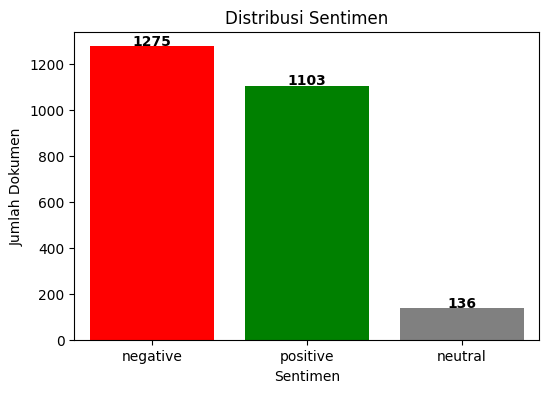

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah tiap label
sentiment_counts = df['sentiment'].value_counts()

# Warna manual sesuai urutan
colors = ['red' if x=='negative' else 'green' if x=='positive' else 'gray' for x in sentiment_counts.index]

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, color='blue')  # warna default

# Ganti warna bar manual
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i])
    plt.text(i, bar.get_height() + 5, str(int(bar.get_height())), ha='center', fontweight='bold')

plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Dokumen')
plt.show()


Labeling data positif dan negativ by https://github.com/fajri91/InSet

In [89]:
selected_column = ['created_at', 'full_text', 'cleaned_text', 'tokenized_text', 'stemmed_text', 'sentiment']
df[selected_column].to_csv('tweets-data/kilang_minyak_data_processed.csv', index=False)
print("Data saved to 'tweets-data/kilang_minyak_data_processed.csv'")

Data saved to 'tweets-data/kilang_minyak_data_processed.csv'
